In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
in_channels = 3
out_channels = 15
kernel_size = 5
stride = 1
padding = 0

In [3]:
c = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=stride, padding=padding)
print(c)

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))


In [4]:
# Size of Weights
print(c.weight.shape)
# Size of Bias
print(c.bias.shape)

torch.Size([15, 3, 5, 5])
torch.Size([15])


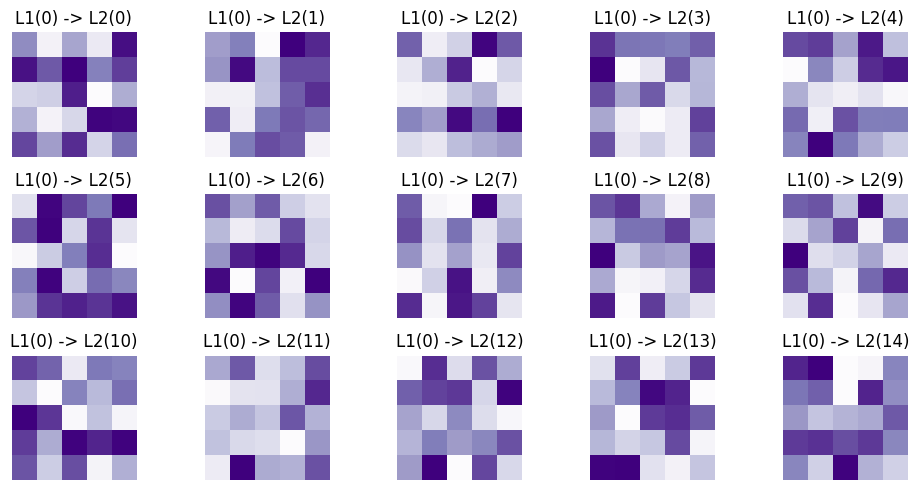

In [6]:
# What do these kernels look like?

fig, axs = plt.subplots(3, 5, figsize=(10, 5))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(torch.squeeze(c.weight[i, 0, :, :]).detach(), cmap="Purples")
    ax.set_title(f"L1(0) -> L2({i})")
    ax.axis("off")

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.628778..3.7666936].


torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


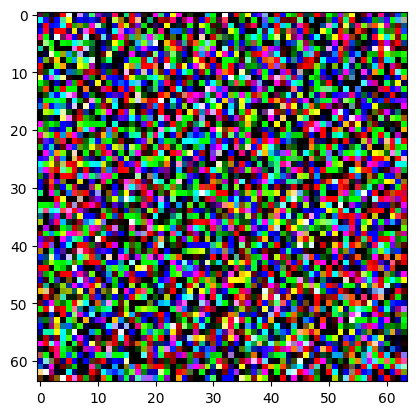

In [7]:
img_size = (1, 3, 64, 64)
img = torch.randn(img_size)
img_to_view = img.permute(2, 3, 1, 0).numpy()
print(img.shape)
print(img_to_view.shape)

plt.imshow(np.squeeze(img_to_view))

In [8]:
conv_res = c(img)
conv_res.shape

torch.Size([1, 15, 60, 60])

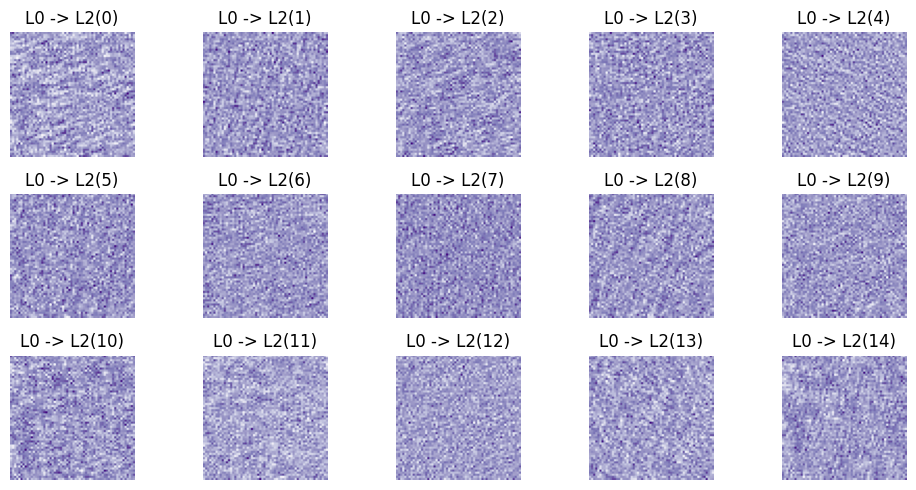

In [18]:
fig, axs = plt.subplots(3, 5, figsize=(10, 5))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(torch.squeeze(conv_res[0, i, :, :]).detach(), cmap="Purples")
    ax.set_title(f"L0 -> L2({i})")
    ax.axis("off")
plt.tight_layout()
plt.show()